In [36]:
#I will scrape the data from the web, parse the results using regular expressions, and visualize the data

In [37]:
#Web Scraping Using Requests and Beautiful Soup (bs4)

In [38]:
# requests for fetching html of website
import requests

# Make the request to a url
r=requests.get("http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html")

# Create soup from content of request
c=r.content

In [39]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(c)

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/nikhilshetty/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [40]:
# Find the element on the webpage

main_content=soup.find("div",attrs={"class":"entry-content"})
main_content

<div class="entry-content" id="entryContent">
<p>CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p>
<p>Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p>
<p>She is among 58 presidents to earn $1 million or more. The previous year, 39 private college presidents earned more than $1 million.</p>
<p>The Chronicle's <a href="https://www.chronicle.com/interactives/executive-compensation#id=table_private_2015">compensation tables </a>come from a review of federal tax documents from the 2015 calendar year, the most recent available. </p>
<p>Former University of Dayton President

In [41]:
# Extract the relevant information

content=main_content.find("ul").text
content

'\nGrant Cornwell, College of Wooster (left in 2015): $911,651\nMarvin Krislov, Oberlin College (left in 2016): \xa0$829,913\nMark Roosevelt, Antioch College, (left in 2015): $507,672\nLaurie Joyner, Wittenberg University (left in 2015): $463,504\nRichard Giese, University of Mount Union (left in 2015): $453,800\nSean Decatur,Kenyon College: $451,698\nAdam Weinberg, Denison University: $435,322\nDaniel Dibiasio, Ohio Northern University: $414,716\nDenvy Bowman, Capital University (left in 2016): $388,570\nAnne Steele, Muskingum University (left in 2016): $384,233\nKathy Krendl, Otterbein University: \xa0$378,035\nRockwell Jones, Ohio Wesleyan University: $366,625\nRobert Helmer, Baldwin Wallace University: $365,616\nRobert Huntington, Heidelberg University: $300,005\nLori Varlotta, Hiram College: $293,336\nJoseph Bruno, Marietta College (left in 2016): $288,295\nW. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761\n'

In [42]:
import pprint
pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

In [74]:
#The next step is to parse this information using regular expressions to identify the presidents, colleges, and salaries
#Regular Expressions

#I extracted the names of the presidents.
import re


name_pattern = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)
names=name_pattern.findall(content)
names

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [69]:
#I extracted the names of the Colleges

school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
schools=school_pattern.findall(content)
schools

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [45]:
#I extract the salaries
salary_pattern = re.compile(r'\$.+')
salar_y = salary_pattern.findall(content)
salar_y

['$911,651',
 '$829,913',
 '$507,672',
 '$463,504',
 '$453,800',
 '$451,698',
 '$435,322',
 '$414,716',
 '$388,570',
 '$384,233',
 '$378,035',
 '$366,625',
 '$365,616',
 '$300,005',
 '$293,336',
 '$288,295',
 '$221,761']

In [46]:
salary='$911,651'
int("".join(salary[1:].split(',')))

911651

In [53]:
# Extract all the salaries and convert to integers
salar_y = salary_pattern.findall(content)

# List comprehension to convert strings to floats
salar_y = [int(''.join(s[1:].split(','))) for s in salar_y]
salar_y

[911651,
 829913,
 507672,
 463504,
 453800,
 451698,
 435322,
 414716,
 388570,
 384233,
 378035,
 366625,
 365616,
 300005,
 293336,
 288295,
 221761]

In [75]:
len(names)

17

In [76]:
len(schools)

17

In [77]:
len(salar_y)

17

In [79]:
#Append information into a dataframe

import pandas as pd

df = pd.DataFrame({'salary': salar_y, 
                   'President': names,
                   'College': schools})

In [80]:
df

,salary,President,College
0,911651,Grant Cornwell,College of Wooster
1,829913,Marvin Krislov,Oberlin College
2,507672,Mark Roosevelt,Antioch College
3,463504,Laurie Joyner,Wittenberg University
4,453800,Richard Giese,University of Mount Union
5,451698,Sean Decatur,Kenyon College
6,435322,Adam Weinberg,Denison University
7,414716,Daniel Dibiasio,Ohio Northern University
8,388570,Denvy Bowman,Capital University
9,384233,Anne Steele,Muskingum University


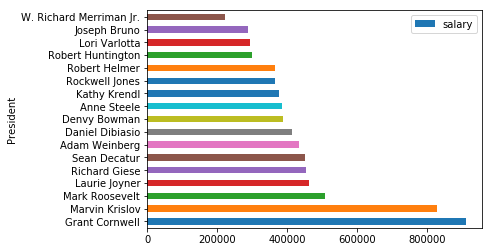

In [82]:
#Data Visualization

df.plot(kind='barh', x = 'President', y = 'salary')